In [1]:
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
X = iris.data
y = iris.target

In [4]:
print(X.shape, y.shape)

(150, 4) (150,)


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [7]:
sc = StandardScaler()
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [23]:
from sklearn.tree import DecisionTreeClassifier
iris_tree = DecisionTreeClassifier(max_depth=5, random_state=0)
iris_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
y_pred_tr = iris_tree.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_tr))

Accuracy: 0.98


In [26]:
#!pip install pydot

In [27]:
from sklearn.tree import export_graphviz

In [28]:
export_graphviz(iris_tree, out_file="iris.dot", feature_names=iris.feature_names,
                class_names=iris.target_names, rounded=True, filled=True, impurity=True)

In [29]:
import pydot

In [30]:
graph = pydot.graph_from_dot_file("iris.dot")[0]
graph

In [31]:
iris_png = graph.create_png()

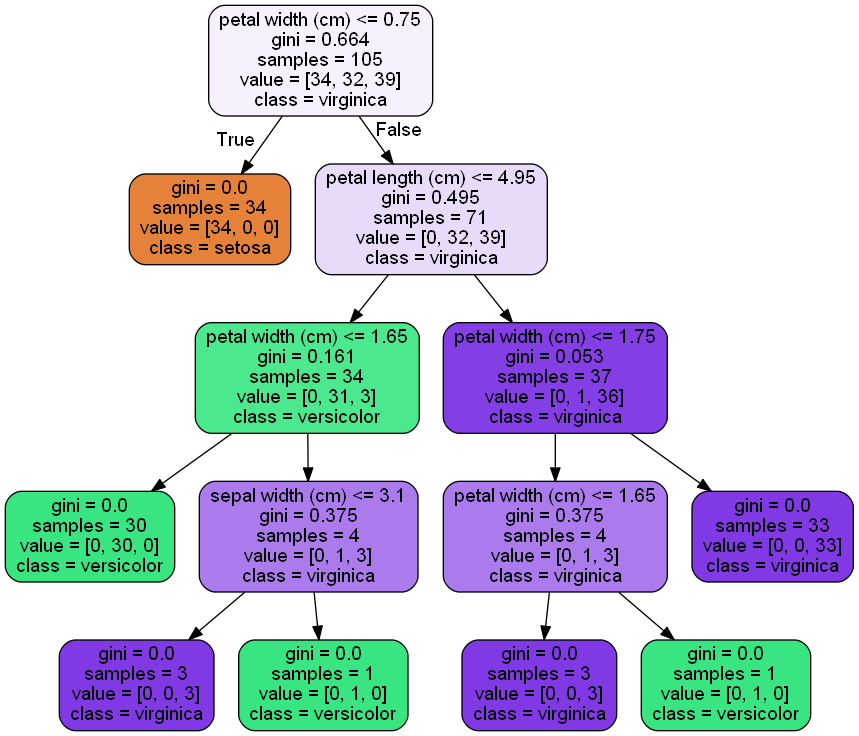

In [34]:
from IPython.core.display import Image
Image(iris_png)